# Basic Analytics in Python
## Simple Linear Regression
https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

In [1]:
import pandas as pd
con = pd.read_csv('Data/ConcreteStrength.csv')

con.drop(columns=['age'], inplace=True)
con.rename(columns={
    'cement': 'Cement',
    'blast_furnace_slag': 'Slag',
    'fly_ash': 'FlyAsh',
    'water': 'Water',
    'superplasticizer': 'SP',
    'coarse_aggregate': 'CoarseAgg',
    'fine_aggregate ': 'FineAgg',
    'concrete_compressive_strength': 'Strength'}, inplace=True)

con.head()

,Cement,Slag,FlyAsh,Water,SP,CoarseAgg,FineAgg,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.30


### Linear Regression with a single explanatory variable

#### Import the Statsmodels library

In [2]:
import statsmodels.api as sm
Y = con['Strength']
X = con['FlyAsh']
X.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: FlyAsh, dtype: float64

#### Adding a column for the constant

In [3]:
X = sm.add_constant(X)
X.head()

,const,FlyAsh
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


#### Running the model

In [4]:
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.63
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           0.000675
Time:                        14:11:05   Log-Likelihood:                -4355.4
No. Observations:                1030   AIC:                             8715.
Df Residuals:                    1028   BIC:                             8725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.3139      0.679     54.978      0.000      35.982      38.646
FlyAsh        -0.0276      0.008     -3.410      0.001      -0.043      -0.012
==============================================================================
Omnibus:                       29.013   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.218
Skew:                           0.351   Prob(JB):                     1.23e-06
Kurtosis:                       2.625   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Histogram of residuals

<AxesSubplot:ylabel='Count'>

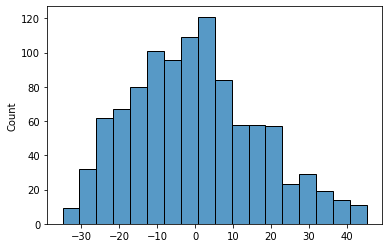

In [5]:
import seaborn as sns
sns.histplot(model_result.resid)

In [6]:
from scipy import stats
mu, std = stats.norm.fit(model_result.resid)
mu, std

(-9.713050213108942e-15, 16.60399385928785)

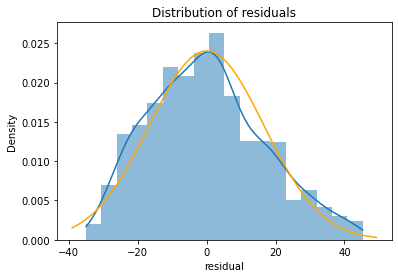

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title='Distribution of residuals', xlabel='residual')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

sns.lineplot(x=x, y=p, color='orange', ax=ax)
plt.show()


#### Boxplot of residuals

<AxesSubplot:>

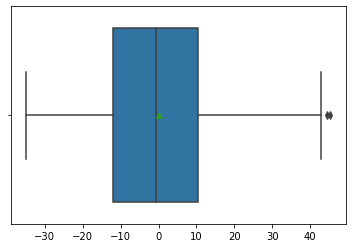

In [8]:
sns.boxplot(x=model_result.resid, showmeans=True)

#### Q-Q plot

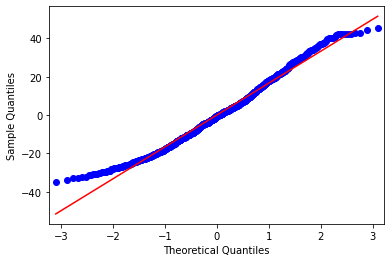

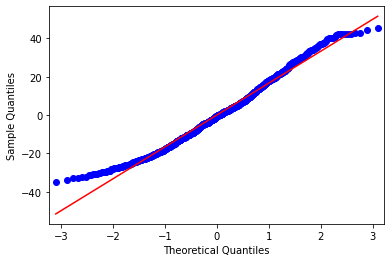

In [9]:
sm.qqplot(model_result.resid, line='s')

#### Fit plot

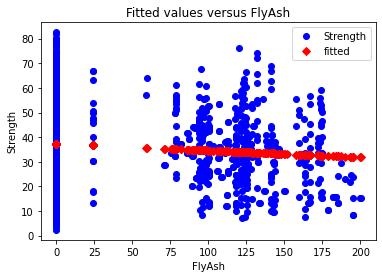

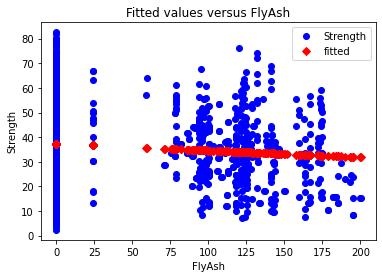

In [10]:
sm.graphics.plot_fit(model_result, 1, vlines=False)

#### Fit plot in seaborn

In [11]:
model_result.fittedvalues

0       37.313896
1       37.313896
2       37.313896
3       37.313896
4       37.313896
          ...    
1025    34.821056
1026    34.122619
1027    34.315862
1028    37.313896
1029    35.152330
Length: 1030, dtype: float64

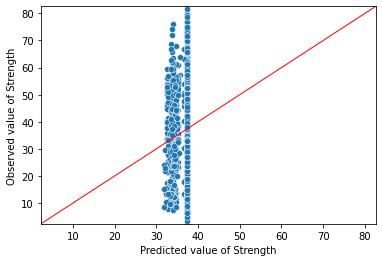

In [12]:
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel('Predicted value of Strength')
ax.set_ylabel('Observed value of Strength')

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()